In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
status1 = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_status_data.csv')
#status2 = pd.read_csv('/home/kyohei/bike_share_data/201408_babs_open_data/201408_status_data.csv')
#status3 = pd.read_csv('/home/kyohei/bike_share_data/201508_status_data.csv')
#status4 = pd.read_csv('/home/kyohei/bike_share_data/201608_status_data.csv')

# 稼働率から見つける
- 稼働率の一日の時間変化をまず見る。
- ステーション別にまず見る

In [3]:
status1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16994602 entries, 0 to 16994601
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               object
dtypes: int64(3), object(1)
memory usage: 518.6+ MB


In [4]:
#事前準備
#デイタイムに変更
a = pd.to_datetime(status1.time)
status1['time'] = a

#曜日情報
status1['dayofweek'] = status1.time.apply(lambda x:x.dayofweek)

#時間
status1['hour'] = status1.time.apply(lambda x:x.time().hour)

#分
status1['minute'] = status1.time.apply(lambda x:x.time().minute)

#月
status1['month'] = status1.time.apply(lambda x:x.date().month)

In [5]:
status1.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour,minute,month
0,2,2,25,2013-08-29 12:06:01,3,12,6,8
1,2,2,25,2013-08-29 12:07:01,3,12,7,8
2,2,2,25,2013-08-29 12:08:01,3,12,8,8
3,2,2,25,2013-08-29 12:09:01,3,12,9,8
4,2,2,25,2013-08-29 12:10:01,3,12,10,8


In [6]:
station = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_station_data.csv')

In [8]:
import datetime

#例 San Francisco Caltrain ID70 貸し借りの最も多いステーション
test = status1[status1.station_id==70]

#日付情報の追加、メモリ節約のため抽出してからにしました。
test['date'] = test.time.apply(lambda x:x.date())

#9/30の日付データ
test_0930 = test[test.date==datetime.date(2013,9,30)]

#ステーション情報の追加
test_0930_merge = pd.merge(test_0930,station,on='station_id',how='inner')

#稼働率の計算
test_0930_merge['op_ratio_docks'] = test_0930_merge.docks_available / test_0930_merge.dockcount
test_0930_merge['op_ratio_bikes'] = test_0930_merge.bikes_available / test_0930_merge.dockcount

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


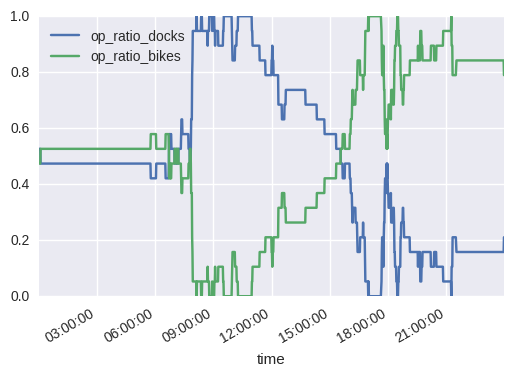

In [9]:
test_0930_merge.plot('time',['op_ratio_docks','op_ratio_bikes'])
#test_0930_merge.plot('time','op_ratio_bikes')

- 平日はほとんど毎日、朝方に貸出不能になり、夕方に返却不能になる。

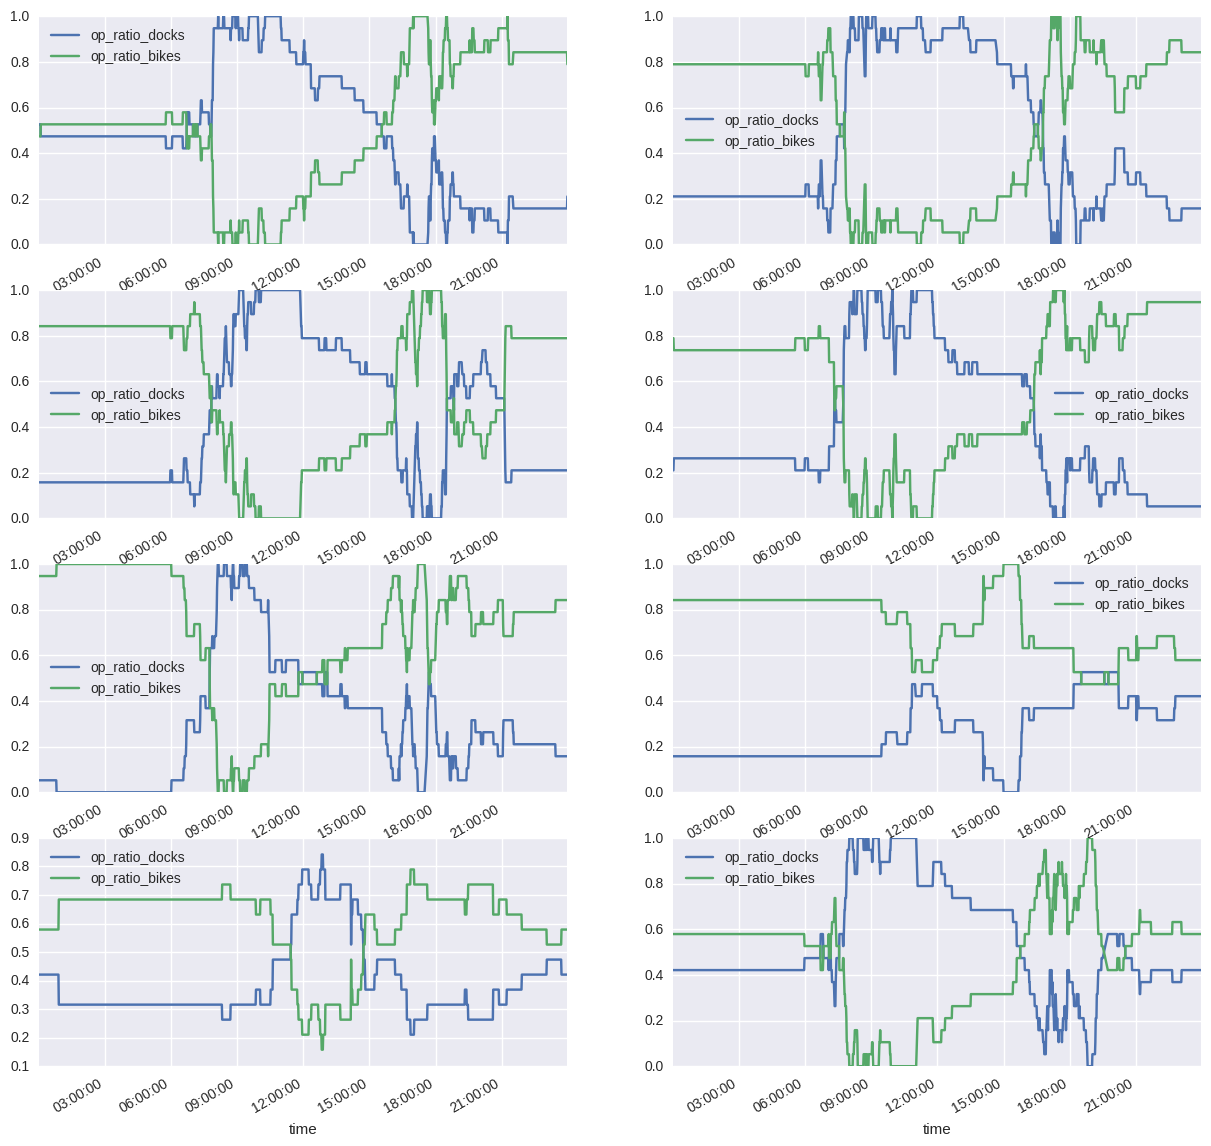

In [10]:
fig, axes = plt.subplots(4,2,figsize=(15,15))
dates = [datetime.date(2013,9,30),
        datetime.date(2013,10,1),
        datetime.date(2013,10,2),
        datetime.date(2013,10,3),
        datetime.date(2013,10,4),
        datetime.date(2013,10,5),
        datetime.date(2013,10,6),
        datetime.date(2013,10,7)]
targets = zip(dates,axes.flatten())

for (date,ax) in targets:
    sample = test[test.date==date]
    sample_merge = pd.merge(sample,station,on='station_id',how='inner')
    sample_merge['op_ratio_docks'] = sample_merge.docks_available / sample_merge.dockcount
    sample_merge['op_ratio_bikes'] = sample_merge.bikes_available / sample_merge.dockcount
    sample_merge.plot('time',['op_ratio_docks','op_ratio_bikes'],ax=ax)

夕方に返却があって、余剰状態が続くが次の日の朝に結局借りられるから、ID70のステーションでは調整の必要は内容だ。特に、金曜日の朝方に着目すると、満タンだった自転車も全てはけているので、実は需要はもっとある可能性がある。

In [75]:
#status1.to_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_status_data_edited.csv',index=False)

In [22]:
print(datetime.time(3,4))

03:04:00


In [63]:
test['time'].iloc[0].hour

12

In [61]:
test.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour,minute,month,date
14758702,70,0,19,12:06:01,3,12,6,8,2013-08-29
14758703,70,0,19,12:07:01,3,12,7,8,2013-08-29
14758704,70,0,19,12:08:01,3,12,8,8,2013-08-29
14758705,70,0,19,12:09:01,3,12,9,8,2013-08-29
14758706,70,0,19,12:10:01,3,12,10,8,2013-08-29


In [52]:
test.head()

,station_id,bikes_available,docks_available,time,dayofweek,hour,minute,month,date
14758702,70,0,19,12:06:01,3,12,6,8,2013-08-29
14758703,70,0,19,12:07:01,3,12,7,8,2013-08-29
14758704,70,0,19,12:08:01,3,12,8,8,2013-08-29
14758705,70,0,19,12:09:01,3,12,9,8,2013-08-29
14758706,70,0,19,12:10:01,3,12,10,8,2013-08-29


In [84]:
test['time'] = test.apply(lambda x:datetime.time(x.hour,x.minute),axis=1)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
#曜日毎の平均かどうについて
a = test.groupby(['dayofweek','time'])['docks_available','bikes_available'].mean().reset_index()

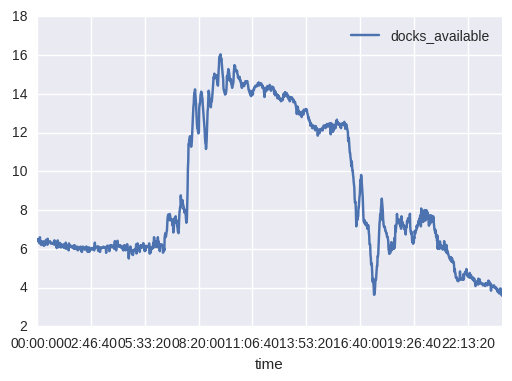

In [90]:
a[a.dayofweek==3].plot('time','docks_available')

In [112]:
a['op_ratio_docks'] = a.docks_available / station[station.station_id==70].dockcount.values.astype(float)
a['op_ratio_bikes'] = a.bikes_available / station[station.station_id==70].dockcount.values.astype(float)

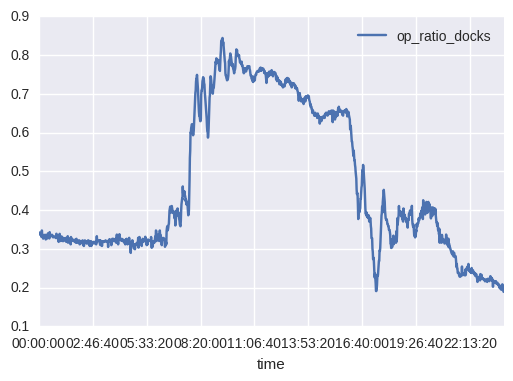

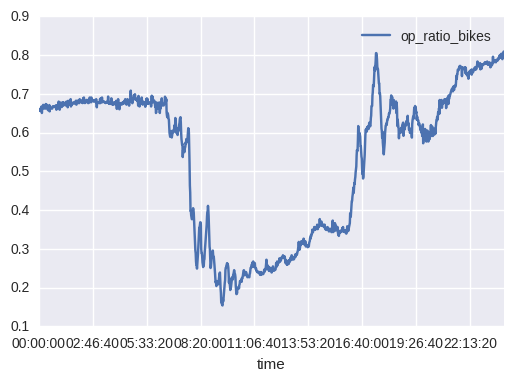

In [114]:
a[a.dayofweek==3].plot('time','op_ratio_docks')
a[a.dayofweek==3].plot('time','op_ratio_bikes')

In [115]:
weather = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_weather_data.csv')

In [130]:
#日付の変換
weather['Date'] = weather['Date'].apply(lambda x: pd.to_datetime(x).date())

In [163]:
zip_trans = {94107:'San Francisco',95113:'San Jose',94063:'Redwood City',94041:'Mountain View',94301:'Palo Alto'}
weather['city'] = weather['zip'].map(zip_trans)

In [164]:
weather_SF = weather[weather.city=='San Francisco']

In [165]:
weather_SF_sub = weather_SF[['Date','Events']]

In [166]:
merge_weather_op = pd.merge(test,weather_SF_sub,left_on='date',right_on='Date',how='inner')

In [169]:
merge_weather_op.Events.value_counts()

Rain        28769
Fog         21280
rain         1440
Fog-Rain     1440
Name: Events, dtype: int64

In [184]:
test_sunny = merge_weather_op[(merge_weather_op.Events=='Rain') | (merge_weather_op.Events=='rain')]

In [185]:
test_sunny_data = test_sunny.groupby(['dayofweek','time'])['docks_available','bikes_available'].mean().reset_index()

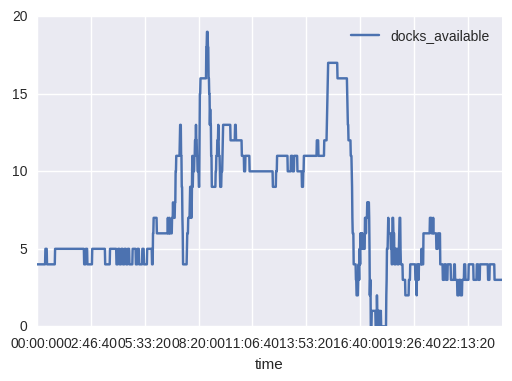

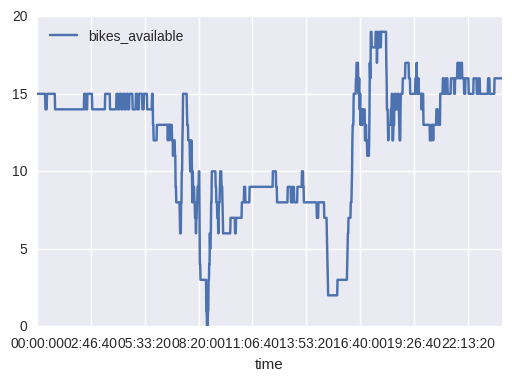

In [186]:
test_sunny_data[test_sunny_data.dayofweek==0].plot('time','docks_available')
test_sunny_data[test_sunny_data.dayofweek==0].plot('time','bikes_available')